In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## 모델에 input하여, 주간 지수값 생성

In [2]:
# 최종 모델
model = pickle.load(open('./final_model.pkl','rb'))
# 생성한 주간 지수 값 테이블
weeklydata = pickle.load(open('./final_table.pkl','rb'))

In [3]:
weeklydata

,date,keyword1,keyword2,keyword3,keyword4,keyword5,google,naver,ccsi,weeklyCLI
0,2016.1.4,825,419,437,986,168,53.0,26.05846,99.5,100.114651
1,2016.1.11,770,348,351,626,182,58.0,25.16599,99.5,100.218829
2,2016.1.18,918,422,441,445,147,74.0,27.38639,99.5,96.924625
3,2016.1.25,1067,425,567,383,148,59.0,24.72622,99.5,90.786863
4,2016.2.1,899,341,485,289,110,63.0,23.01888,97.2,90.612911
...,...,...,...,...,...,...,...,...,...,...
247,2020.9.28,489,90,114,95,78,63.0,25.29102,79.4,101.857171
248,2020.10.5,816,183,177,109,78,81.0,28.63240,91.6,104.707534
249,2020.10.12,857,199,176,112,91,82.0,26.85177,91.6,100.781811
250,2020.10.19,911,155,143,95,129,93.0,27.25273,91.6,100.454511


## 유효성 확인

* test set의 주간 지수와 소비자심리지수의 상관계수 확인 <br>
: 상관계수가 0.776009로 강한 양의 상관관계를 갖는다. 

In [4]:
X_test = pickle.load(open('./dataset/dataset_mean/X_test.pkl','rb'))
y_test = pickle.load(open('./dataset/dataset_mean/y_test.pkl','rb'))
scaler = pickle.load(open('./final_scaler.pkl','rb'))
y_pred = model.predict( scaler.transform(X_test) )

In [5]:
test = pd.DataFrame()
test['ccsi'] = y_test['ccsi'].tolist()
test['weeklyCLI'] = y_pred
test

,ccsi,weeklyCLI
0,101.0,100.551262
1,100.5,101.500840
2,104.2,103.944875
3,96.9,95.167475
4,78.4,70.771749
5,70.8,77.066110
6,77.6,84.032023
7,81.8,89.331758
8,84.2,93.724905
9,88.2,98.341936


In [6]:
test[['weeklyCLI', 'ccsi']].corr(method = 'pearson') 

,weeklyCLI,ccsi
weeklyCLI,1.000000,0.776009
ccsi,0.776009,1.000000


* test set에 대한 RMSE <br>
: 8.4384

In [7]:
print("test RMSE about weekly CCSI: ", np.sqrt(mean_squared_error(test['weeklyCLI'], test['ccsi'])))

test RMSE about weekly CCSI:  8.43842267189124


* 전체 레코드에 대한 RMSE <br>
: 4.8075로 작은 값. ccsi의 추세를 잘 따라간다.

In [8]:
print("RMSE about weekly CCSI: ", np.sqrt(mean_squared_error(weeklydata['weeklyCLI'], weeklydata['ccsi'])))

RMSE about weekly CCSI:  4.807544722268003


* 개발한 주간 경제보조지수가 월간 경제 지표인 소비자 심리지수의 추세를 잘 따르는지 확인<br>
: 시각화결과, 펜데믹 사태로 인해 경제 상황이 안좋아진 2020년에 대해서는 매우 좋은 예측력을 보이지는 않았다. 따라서 2020년의 데이터를 살펴보며 추가적인 사후분석을 하고자 한다.

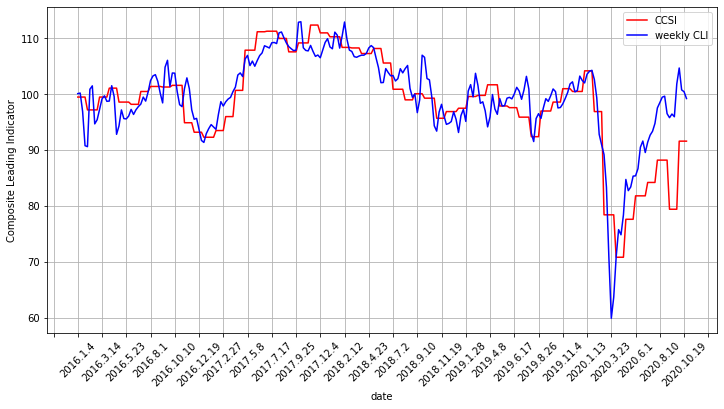

In [9]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.plot(weeklydata['date'], weeklydata['ccsi'], color = 'red', label = 'CCSI')
plt.plot(weeklydata['date'], weeklydata['weeklyCLI'], color = 'blue', label = 'weekly CLI')
plt.xlabel("date")
plt.ylabel("Composite Leading Indicator")
ax = plt.subplot()
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.grid(True)
plt.legend()
plt.show()